スパースモデリング第12章　辞書の探求
==

In [1]:
from matplotlib.font_manager import FontProperties

font_path = u'/Library/Fonts/ヒラギノ角ゴ Pro W3.otf'
font_prop = FontProperties(fname=font_path)
plt.rc('font',family=font_prop.get_name())

ランダムな辞書を生成
--

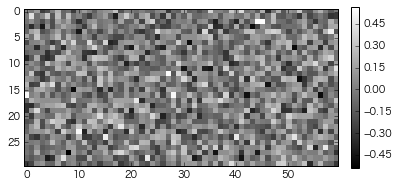

In [95]:
A0 = np.random.randn(30, 60)
A0 = np.dot(A0, np.diag(1. / np.sqrt(np.diag(np.dot(A0.T, A0)))))

plt.imshow(A0, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.024, pad=0.04)

信号事例を生成
--

(0, 29)

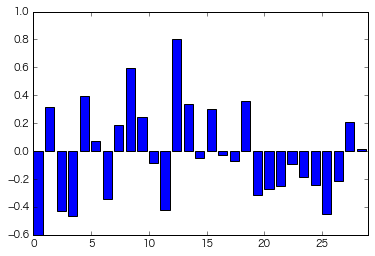

In [96]:
Y = np.zeros((30, 4000))
sig = 0.1
for i in range(4000):
    Y[:, i] = np.dot(A0[:, np.random.randint(60, size=4)], np.random.randn(4)) + np.random.randn(30) * sig
    
plt.bar(range(30), Y[:, 0])
plt.xlim(0, 29)

追跡法
--

In [97]:
def OMP(A, b, k0, eps):
    """ 
    直交マッチング追跡(orthogonal matching pursuit; OMP) 
    
    A nxm行列
    b n要素の観測
    eps 誤差の閾値

    """
    # 初期化
    x = np.zeros(A.shape[1])
    S = np.zeros(A.shape[1], dtype=np.uint8)
    r = b.copy()
    rr = np.dot(r, r)
    for _ in range(k0):
        # 誤差計算
        err = rr - np.dot(A[:, S == 0].T, r) ** 2
            
        # サポート更新
        ndx = np.where(S == 0)[0]
        S[ndx[err.argmin()]] = 1
    
        # 解更新
        As = A[:, S == 1]
        pinv = np.linalg.pinv(np.dot(As, As.T))
        x[S == 1] = np.dot(As.T, np.dot(pinv, b))
        
        # 残差更新
        r = b - np.dot(A, x)
        rr = np.dot(r, r)
        if rr < eps:
            break
            
    return x, S

MOD辞書学習アルゴリズム
--

0 79.996337843
1 70.4773198391
2 66.3341648708
3 63.6113490059
4 61.2458564697
5 58.9246826401
6 56.7439500961
7 54.4496004024
8 52.2213269613
9 50.1308900133
10 47.9592241482
11 45.3691276583
12 42.8605044236
13 40.6804806643
14 39.1492034575
15 38.1206898487
16 37.3152859581
17 36.7247879805
18 36.3272723529
19 36.0273322754
20 35.373119856
21 34.7313723742
22 34.3807430822
23 34.2131887855
24 34.2053620755
25 34.154774673
26 34.120217877
27 34.1034395693
28 34.0542182103
29 34.0103022973
30 33.9826220561
31 33.9108159774
32 33.7845182081
33 33.5879542252
34 33.3646629068
35 33.2755676172
36 33.2753388293
37 33.2488781134
38 33.2105092817
39 33.1680867079
40 33.1210199803
41 33.0923314125
42 33.0897998378
43 33.0826042055
44 33.0829024867
45 33.0803909523
46 33.0818598638
47 33.0823478953
48 33.0834185189
49 33.085330331


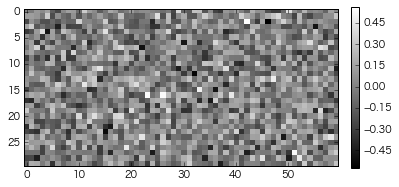

In [98]:
# 初期辞書
A = np.random.randn(30, 60)
A = np.dot(A, np.diag(1. / np.sqrt(np.diag(np.dot(A.T, A)))))

X = np.zeros((A.shape[1], Y.shape[1]))
eps = A.shape[0] * (sig ** 2)
k0 = 4
n_iter = 50

for k in range(n_iter):
    for i in range(Y.shape[1]):
        X[:, i], _ = OMP(A, Y[:, i], k0, eps=eps)

    A = np.dot(Y, np.dot(X.T, np.linalg.pinv(np.dot(X, X.T))))
    A = np.dot(A, np.diag(1. / np.sqrt(np.diag(np.dot(A.T, A)))))

    err = np.linalg.norm(Y - np.dot(A, X))
    print(k, err)
    if k == 0:
        err_old = err
    else:
        opt = err_old - err
        if opt < 1e-6:
            break
        
plt.imshow(A, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.024, pad=0.04)

In [94]:
np.sum(np.diag(np.dot(A0.T, A)) > 0.99)

0